### ** 해석과 판단의 이유를 모두 상세하게 적어주세요 **


In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('seaborn')
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

# Data 

데이터 출처 : https://www.kaggle.com/avikasliwal/used-cars-price-prediction 

< y > 
* **Price** : The price of the used car in INR Lakhs.



< X > 
* Name : The brand and model of the car
* Location : The location in which the car is being sold or is available for purchase.
* Year : The year or edition of the model.
* Kilometers_Driven : The total kilometres driven in the car by the previous owner(s) in KM.
* Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
* Transmission : The type of transmission used by the car. (Automatic / Manual)
* Owner_Type : Whether the ownership is Firsthand, Second hand or other.
* Mileage : The standard mileage offered by the car company in kmpl or km/kg
* Engine : The displacement volume of the engine in CC.
* Power : The maximum power of the engine in bhp.
* Seats : The number of seats in the car.
* New_Price : The price of a new car of the same model.

In [3]:
# Load Data 
data = pd.read_csv("assignment2_data.csv")
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


# Linear Regression

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
Unnamed: 0           6019 non-null int64
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6017 non-null object
Engine               5983 non-null object
Power                5983 non-null object
Seats                5977 non-null float64
New_Price            824 non-null object
Price                6019 non-null float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [5]:
# 이름에서 회사명만 추출한다.
for i in range(data.shape[0]):
    data.loc[i, 'Company'] = data['Name'][i].split()[0]
print(data.Company.unique())

# column에서 단위 부분을 제거한다.
data['Mileage']=data['Mileage'].str.extract(r'(\d+\.\d+)').astype(float)
data.loc[data.Mileage ==0.0, 'Mileage'] = np.nan  # 연비가 0인 경우는 없다.
data['Engine']=data['Engine'].str.extract(r'(\d+)').astype(float)
data.loc[data.Engine ==0.0, 'Engine'] = np.nan  # 엔진 cc가 0인 경우는 없다.
data['Power']=data['Power'].str.extract(r'(\d+\.\d+)').astype(float)
data.loc[data.Power ==0.0, 'Power'] = np.nan

['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentley'
 'Lamborghini']


In [6]:
def fill_na_with_mode(ds, brandname, colname):
    fill_value = ds.loc[ds['Company'] == brandname][colname].mode()
#     condi = ((ds[colname] == 0)|(ds[colname].isnull())|(ds[colname].isna()))
    condit = ((ds['Company'] == brandname) & (ds[colname].isna()))
#     print(condit)
    ds.loc[condit, colname] = ds.loc[condit, colname].fillna(fill_value)
#     ds.loc[condit, colname] = fill_value

In [7]:
# 회사별 평균 값으로 결측치를 대체하였다.
data = data.groupby('Company').apply(lambda g: g.fillna(g.mean()))

In [8]:
# Volvo의 경우 전 차종 모두 Power column이 null이어서 평균으로 대체하였다.
data.fillna(data.mean(), inplace = True)

In [9]:

# Regression에 영향을 미치지 못할 것 같은 column들과 
# NaN값이 너무 많은 'New_Price' column은 제거한다.

data.drop(['Unnamed: 0', 'Name', 'Location', 'New_Price'], axis = 'columns', inplace=True)
data = data.astype({'Seats': 'int64'})
data.loc[data.Company == 'ISUZU', 'Company'] = 'Isuzu'
data.head()

Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
Company                                                                      
Ambassador 1221  2003              80000    Diesel       Manual      Third   
Audi       4     2013              40670    Diesel    Automatic     Second   
           22    2015              55985    Petrol    Automatic      First   
           33    2010              35000    Diesel    Automatic      First   
           50    2015              13648    Diesel    Automatic      First   

                 Mileage  Engine   Power  Seats  Price     Company  
Company                                                             
Ambassador 1221    12.80  1489.0   35.50      5   1.35  Ambassador  
Audi       4       15.20  1968.0  140.80      5  17.74        Audi  
           22      13.53  1984.0  177.01      5  23.50        Audi  
           33      12.40  2698.0  179.50      5  11.50        Audi  
           50      17.11  1968.0  174.33      5  21.43        Audi

In [10]:
data['Owner_Type']=data.Owner_Type.map({'First':1, 'Fourth & Above':4, 'Second':2, 'Third':3}) 

In [11]:
# Column별로 unique한 데이터의 개수를 출력하였다. 
# 이 때, unique한 데이터의 개수가 너무 많으면 앞과 뒤에서 5개씩만 print한다.
print('<Unique Value per Columns>')
for i in data.columns:
    if i == 'datetime':
        continue
    print('*{} : {}'.format(i, len(np.unique(data[i]))), end = '\n\t')
    if (len(np.unique(data[i])) > 10):
        print(np.unique(data[i])[:5], end ='...')
        print(np.unique(data[i])[-5:])
    else:
        print(np.unique(data[i]))

<Unique Value per Columns>
*Year : 22
	[1998 1999 2000 2001 2002]...[2015 2016 2017 2018 2019]
*Kilometers_Driven : 3093
	[ 171  600 1000 1001 1011]...[ 480000  620000  720000  775000 6500000]
*Fuel_Type : 5
	['CNG' 'Diesel' 'Electric' 'LPG' 'Petrol']
*Transmission : 2
	['Automatic' 'Manual']
*Owner_Type : 4
	[1 2 3 4]
*Mileage : 442
	[6.4  7.5  7.81 7.94 8.  ]...[30.46 31.79 32.26 33.44 33.54]
*Engine : 153
	[ 72. 624. 793. 796. 799.]...[4951. 5000. 5204. 5461. 5998.]
*Power : 258
	[34.2  35.5  37.48 37.5  38.4 ]...[362.9 364.9 387.3 394.3 488.1]
*Seats : 9
	[ 0  2  4  5  6  7  8  9 10]
*Price : 1373
	[0.44 0.45 0.5  0.51 0.53]...[ 93.67  97.07 100.   120.   160.  ]
*Company : 30
	['Ambassador' 'Audi' 'BMW' 'Bentley' 'Chevrolet']...['Smart' 'Tata' 'Toyota' 'Volkswagen' 'Volvo']


/Users/hbjk0305/opt/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/hbjk0305/opt/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


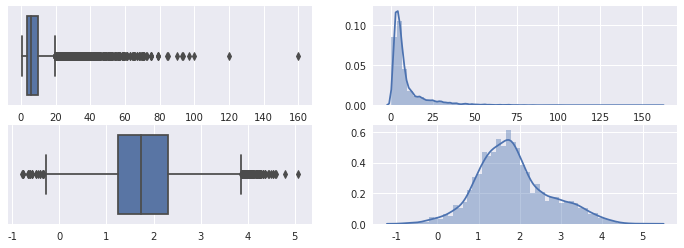

In [12]:
figure, axes = plt.subplots(ncols=2, nrows=2)
figure.set_size_inches(12,4)

sns.boxplot(data[["Price"]], ax=axes[0][0])
sns.distplot(data[["Price"]],ax=axes[0][1])

data['Log_Price'] = np.log(data.Price+0.01)
sns.boxplot(data[["Log_Price"]], ax=axes[1][0])
sns.distplot(data[["Log_Price"]],ax=axes[1][1])

데이터가 왼쪽으로 편향된 경향이 있어 log변환을 하였다.

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


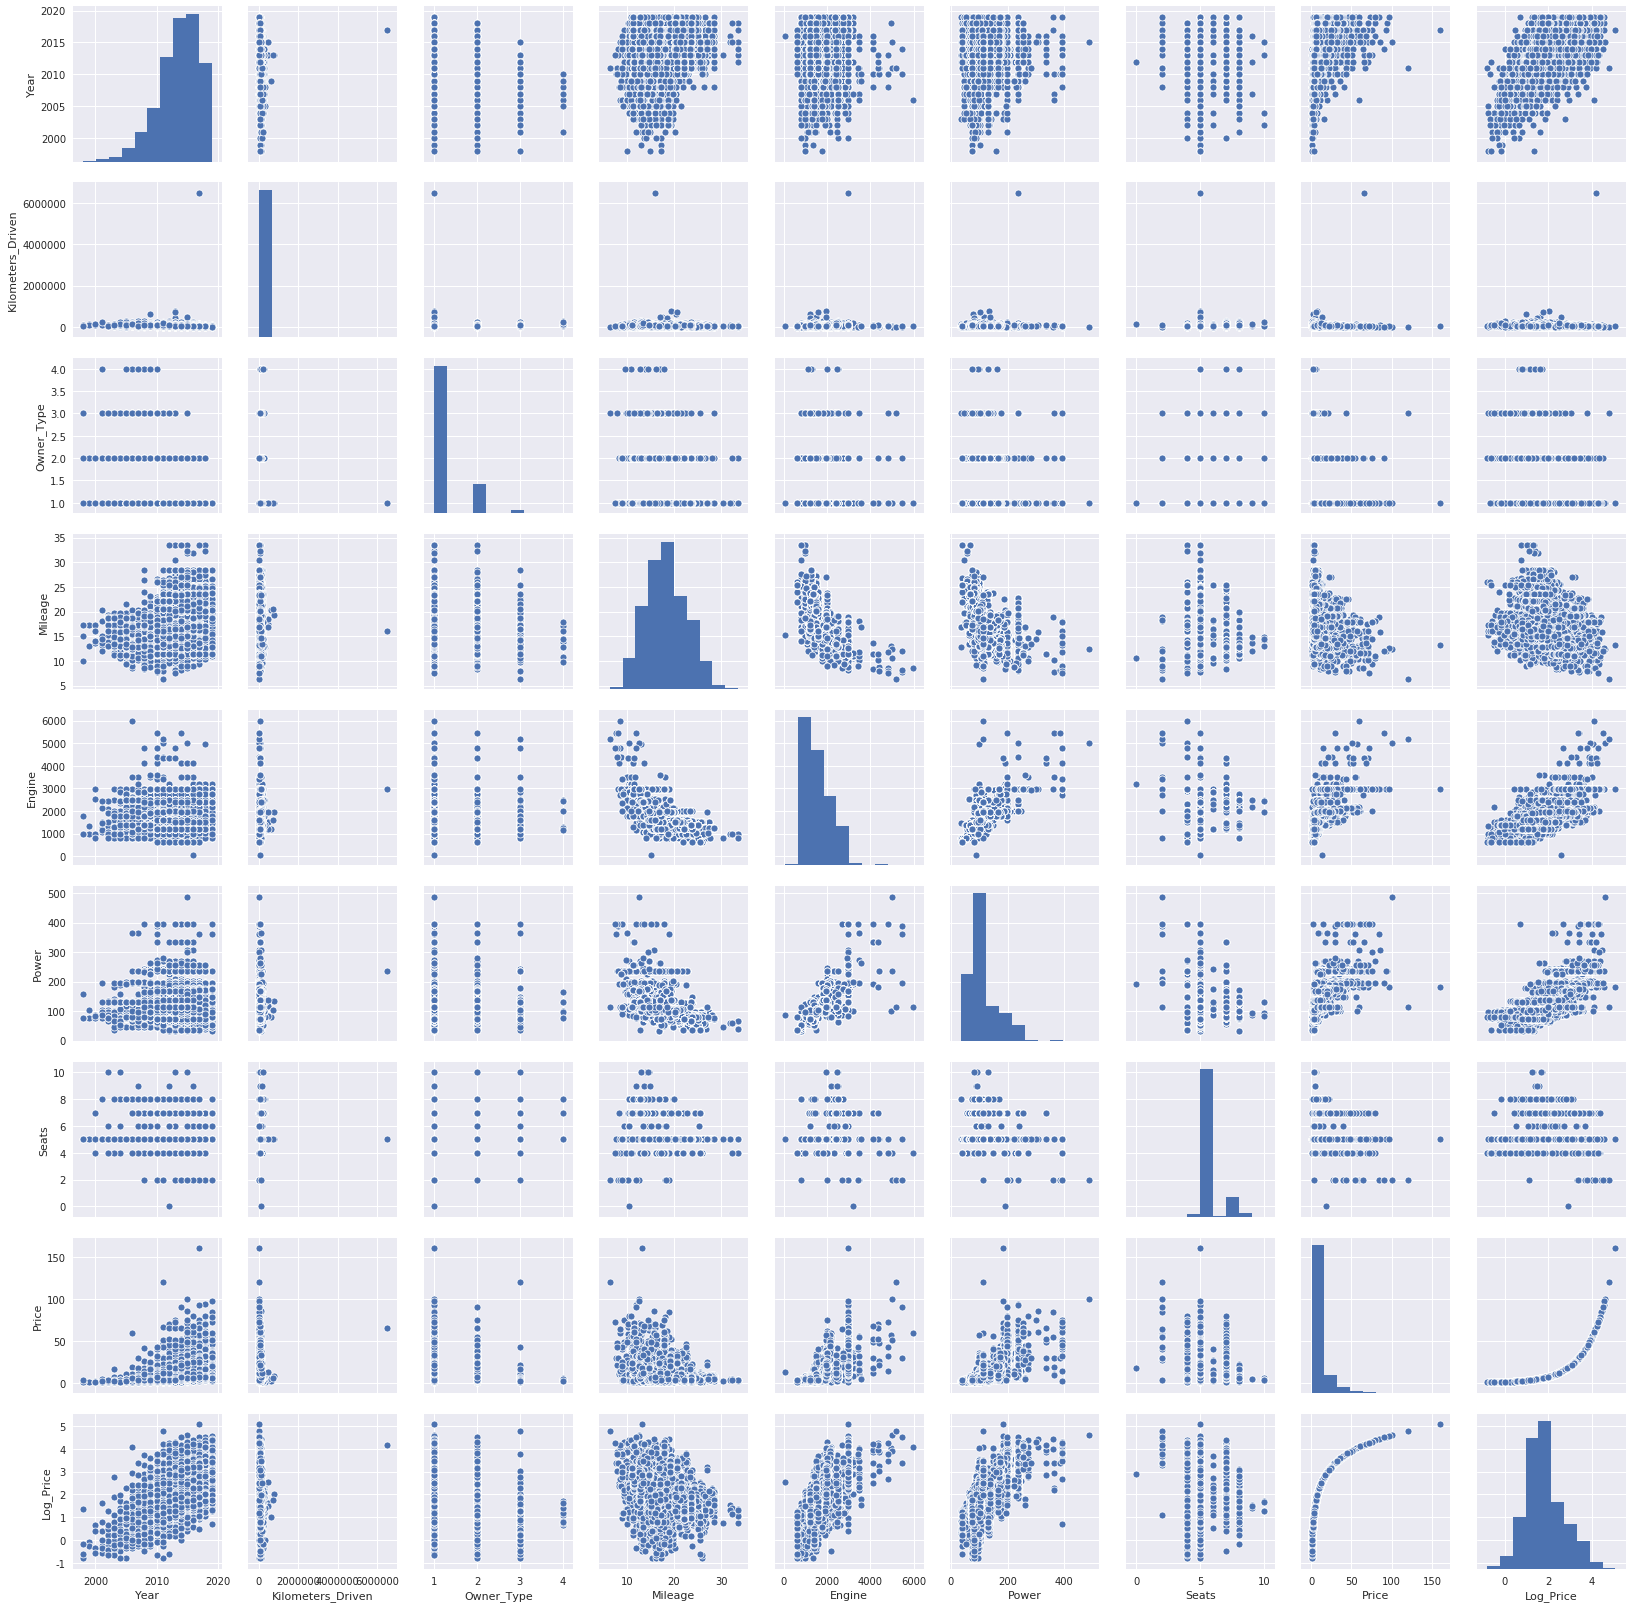

In [13]:
sns.pairplot(data)

price보다는 log price가 Year, Engine, Power 등과 선형성을 보이는 것으로 추정된다.

In [14]:
# Categorical data를 one-hot encoding한다.
data_dum = pd.get_dummies(data)
data_dum.head()

Year  Kilometers_Driven  Owner_Type  Mileage  Engine   Power  \
Company                                                                         
Ambassador 1221  2003              80000           3    12.80  1489.0   35.50   
Audi       4     2013              40670           2    15.20  1968.0  140.80   
           22    2015              55985           1    13.53  1984.0  177.01   
           33    2010              35000           1    12.40  2698.0  179.50   
           50    2015              13648           1    17.11  1968.0  174.33   

                 Seats  Price  Log_Price  Fuel_Type_CNG  ...  \
Company                                                  ...   
Ambassador 1221      5   1.35   0.307485              0  ...   
Audi       4         5  17.74   2.876386              0  ...   
           22        5  23.50   3.157426              0  ...   
           33        5  11.50   2.443216              0  ...   
           50        5  21.43   3.065258              0  ...   

                 Company_Mitsubishi  Company_Nissan  Company_Porsche  \
Company                                                                
Ambassador 1221                   0               0                0   
Audi       4                      0               0                0   
           22                     0               0                0   
           33                     0               0                0   
           50                     0               0                0   

                 Company_Renault  Company_Skoda  Company_Smart  Company_Tata  \
Company                                                                        
Ambassador 1221                0              0              0             0   
Audi       4                   0              0              0             0   
           22                  0              0              0             0   
           33                  0              0              0             0   
           50                  0              0              0             0   

                 Company_Toyota  Company_Volkswagen  Company_Volvo  
Company                                                             
Ambassador 1221               0                   0              0  
Audi       4                  0                   0              0  
           22                 0                   0              0  
           33                 0                   0              0  
           50                 0                   0              0  

[5 rows x 46 columns]

In [15]:
X = data.drop(['Price', 'Log_Price'], axis=1)
X_dum = data_dum.drop(['Price', 'Log_Price'], axis=1)
y = data.Price
y_ = data.Log_Price

In [16]:
# min max 값이 들쭉날쭉 하니 scaling을 진행하였다.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # Scaling
scaler.fit_transform(X_dum)
X_dum_ = pd.DataFrame(scaler.fit_transform(X_dum), columns = X_dum.columns)
X_dum_.head()

,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,...,Company_Mitsubishi,Company_Nissan,Company_Porsche,Company_Renault,Company_Skoda,Company_Smart,Company_Tata,Company_Toyota,Company_Volkswagen,Company_Volvo
0,-3.168158,0.232975,3.938359,-1.327970,-0.219535,-1.501092,-0.34211,-0.096908,0.937018,-0.018232,...,-0.067127,-0.123899,-0.054768,-0.157115,-0.172026,-0.012891,-0.178571,-0.270718,-0.234999,-0.059171
1,-0.109559,-0.197985,1.746903,-0.751367,0.577852,0.519716,-0.34211,-0.096908,0.937018,-0.018232,...,-0.067127,-0.123899,-0.054768,-0.157115,-0.172026,-0.012891,-0.178571,-0.270718,-0.234999,-0.059171
2,0.502161,-0.030170,-0.444554,-1.152586,0.604487,1.214620,-0.34211,-0.096908,-1.067215,-0.018232,...,-0.067127,-0.123899,-0.054768,-0.157115,-0.172026,-0.012891,-0.178571,-0.270718,-0.234999,-0.059171
3,-1.027139,-0.260115,-0.444554,-1.424071,1.793075,1.262406,-0.34211,-0.096908,0.937018,-0.018232,...,-0.067127,-0.123899,-0.054768,-0.157115,-0.172026,-0.012891,-0.178571,-0.270718,-0.234999,-0.059171
4,0.502161,-0.494080,-0.444554,-0.292486,0.577852,1.163189,-0.34211,-0.096908,0.937018,-0.018232,...,-0.067127,-0.123899,-0.054768,-0.157115,-0.172026,-0.012891,-0.178571,-0.270718,-0.234999,-0.059171


In [17]:
X.corr()

,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats
Year,1.000000,-0.173048,-0.397152,0.289726,-0.050575,-0.003225,0.015656
Kilometers_Driven,-0.173048,1.000000,0.085337,-0.064392,0.090810,0.029140,0.082373
Owner_Type,-0.397152,0.085337,1.000000,-0.151363,0.051372,0.033880,0.011210
Mileage,0.289726,-0.064392,-0.151363,1.000000,-0.642984,-0.474138,-0.340835
Engine,-0.050575,0.090810,0.051372,-0.642984,1.000000,0.756334,0.391042
Power,-0.003225,0.029140,0.033880,-0.474138,0.756334,1.000000,0.009761
Seats,0.015656,0.082373,0.011210,-0.340835,0.391042,0.009761,1.000000


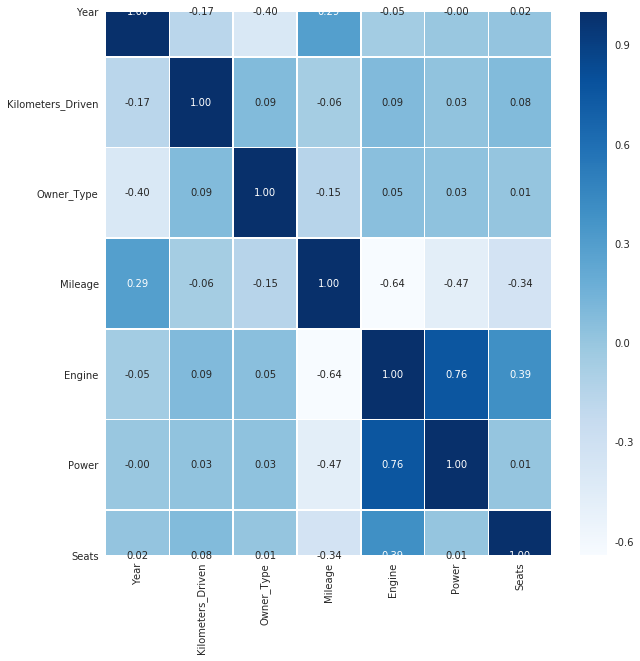

In [18]:
# heatmap : correlation matrix 시각화 
plt.figure(figsize=(10,10))
sns.heatmap(data = X.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

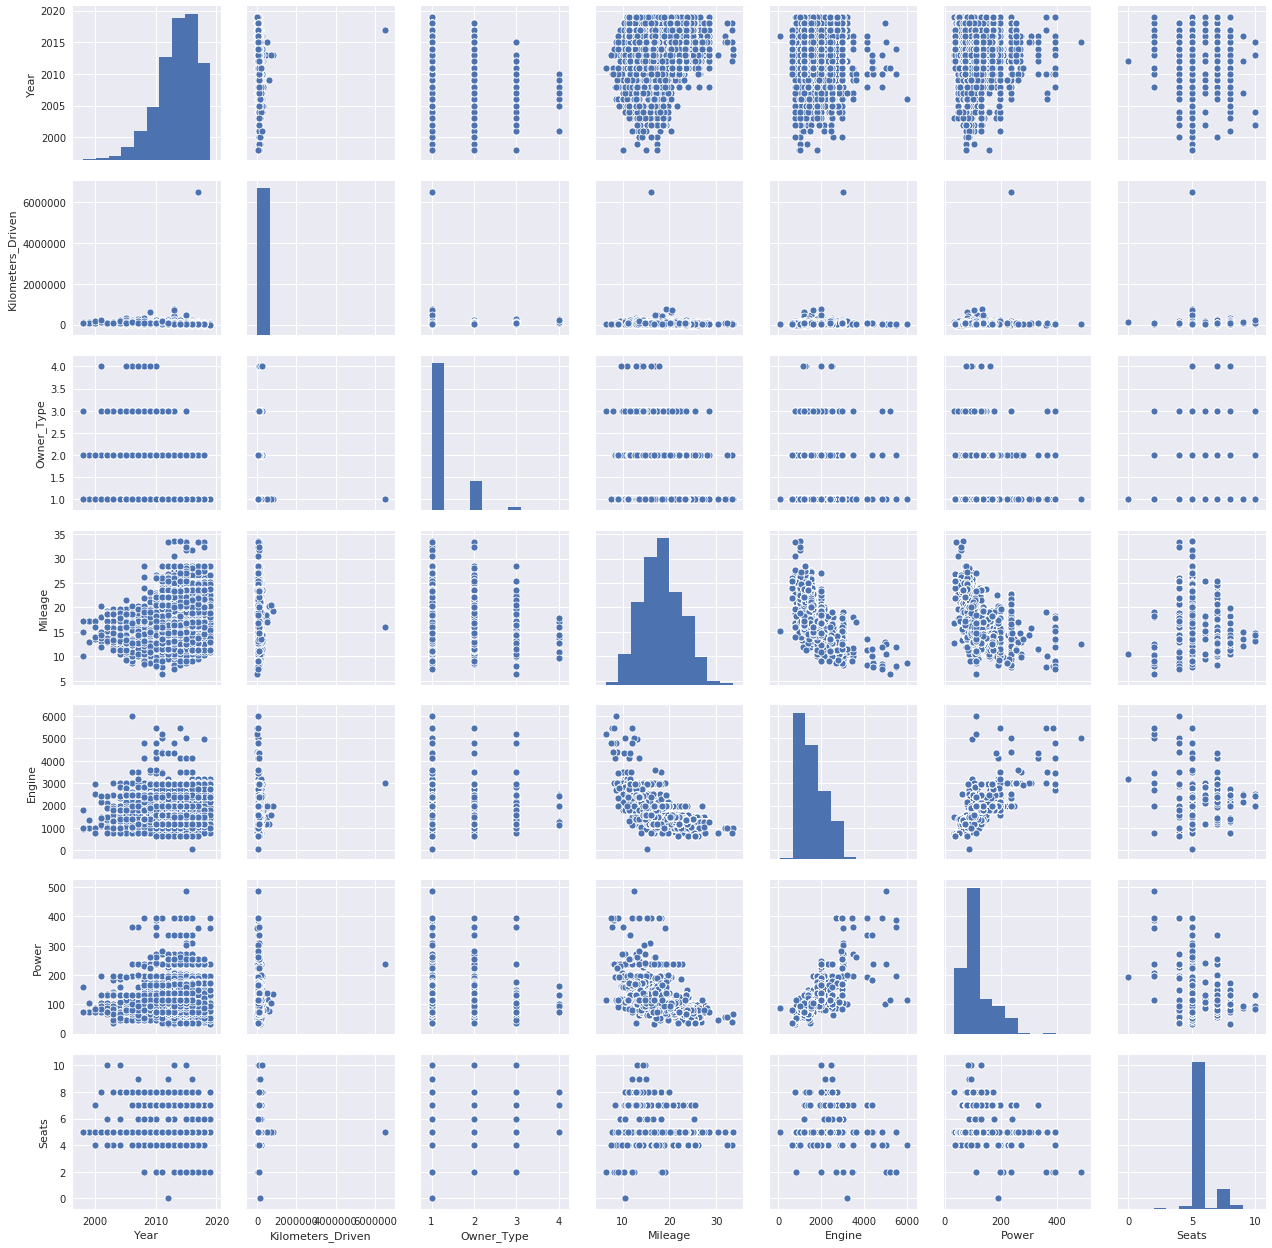

In [19]:
# 변수들 사이의 pairplot 
sns.pairplot(X)

* Engine과 Power는 높은 양의 선형관계를 보이고 있다.
* Mileage와 Engine도 높은 음의 선형관계를 보이고 있다.
* Year과 Owner_Type은 음의 선형관계가 의심된다.
* Power과 Mileage은 음의 선형관계가 의심된다.
* Seats와 Mileage은 음의 선형관계가 의심된다.

In [20]:
# VIF check 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_dum_.values, i) for i in range(X_dum_.shape[1])]
vif["features"] = X_dum_.columns
vif.sort_values(["VIF Factor"], ascending=[False])

/Users/hbjk0305/opt/anaconda3/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
22,inf,Company_Ford
33,inf,Company_Mini
25,inf,Company_Isuzu
26,inf,Company_Jaguar
27,inf,Company_Jeep
28,inf,Company_Lamborghini
29,inf,Company_Land
30,inf,Company_Mahindra
31,inf,Company_Maruti
32,inf,Company_Mercedes-Benz


In [21]:
# X2 = X_dum_.drop(['Company_Ford'], axis=1) #9.23
# X2 = X_dum_.drop(['Company_Honda'], axis=1) #9.23
# X2 = X_dum_.drop(['Company_Jaguar'], axis=1) #34.145

X2 = X_dum_.drop(['Company_Honda', 'Fuel_Type_Petrol', 'Transmission_Automatic', 'Power'], axis=1)

여러 시도를 해본 결과 아래와 같이 column을 제거하니 다중공선성 문제를 해결할 수 있었다.

추가로 Power의 상관계수가 너무 커서 이 column을 제거하였다.

In [22]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif["features"] = X2.columns
vif.sort_values(["VIF Factor"], ascending=[False])

,VIF Factor,features
4,4.721522,Engine
3,3.808016,Mileage
27,2.680736,Company_Maruti
7,2.521645,Fuel_Type_Diesel
5,2.425441,Seats
20,2.392455,Company_Hyundai
10,2.218489,Transmission_Manual
37,2.093356,Company_Toyota
28,2.066690,Company_Mercedes-Benz
26,1.941097,Company_Mahindra


In [23]:
# target 변수와의 상관관계 확인
data_dum.corr()['Price'].sort_values(ascending=False)

Price                     1.000000
Log_Price                 0.850677
Power                     0.723121
Engine                    0.658839
Transmission_Automatic    0.586025
Company_Mercedes-Benz     0.365876
Fuel_Type_Diesel          0.320645
Year                      0.305327
Company_BMW               0.303592
Company_Audi              0.289977
Company_Land              0.267117
Company_Jaguar            0.205837
Company_Porsche           0.190289
Company_Lamborghini       0.127351
Company_Mini              0.102550
Company_Bentley           0.057062
Seats                     0.052133
Company_Toyota            0.050832
Company_Volvo             0.049314
Company_Jeep              0.041281
Company_Isuzu             0.010414
Company_Mitsubishi        0.009477
Fuel_Type_Electric        0.005534
Company_Force            -0.000292
Company_Smart            -0.007466
Company_Ambassador       -0.009367
Kilometers_Driven        -0.011493
Fuel_Type_LPG            -0.025499
Company_Datsun      

## Regression

In [24]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso

from sklearn.metrics import mean_squared_error

In [40]:
def regression(model, X_train, X_test, y_train, y_test, ylim = 50, title = '', label = ''):
    # train data에 fit시킴
    model.fit(X_train, y_train)
    pred = model.predict(X_train)

    # fit된 모델의 R-square
    print('<Train Set>')
    print("R-square:\t",model.score(X_train, y_train))
    print("MSE:\t",mean_squared_error(y_train, pred))
    print('\n<Model Coefficient>')
    print(model.coef_) # 추정된 회귀계수 (intercept제외)
    print(model.intercept_) # intercept

    # test data R-square
    print('\n<Test Set>')
    print("R-square:\t",model.score(X_test, y_test))

    # 예측 vs 실제 데이터 plot
    plt.plot(y_test, model.predict(X_test), '.')

    # 예측과 실제가 비슷하면, 라인상에 분포함
    x = np.linspace(0, ylim, 10)
    y = x
    plt.title(title)
    plt.ylabel(label)
    plt.plot(x, y)
    plt.show()

### 1) Regression with Price

In [42]:
# train test split 
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=0)

<Train Set>
R-square:	 0.7581511564186819
MSE:	 30.62332999388255

<Model Coefficient>
[[ 3.53252098e+00  2.06416029e-01 -8.12702247e-02 -4.14664978e-01
   4.91746968e+00 -4.10952797e-01 -6.43433607e-02  4.16632789e-02
  -3.57311435e-16  8.11612698e-02 -2.59491607e-01  8.49427972e-02
   2.33074073e+00  2.67659553e+00  2.88521559e-01  1.11753817e-01
  -5.48501461e-02  8.00532502e-02 -4.08510212e-02  1.10915596e-01
   4.39272459e-01 -1.17455339e-01  1.72287980e+00  2.21923875e-01
   1.07871473e+00  2.31928779e+00 -5.47752306e-01  8.02760361e-01
   2.89934140e+00  1.03275371e+00 -6.36774529e-02 -4.71618446e-02
   1.51696171e+00  2.44087407e-02  4.69272689e-03  1.36891368e-16
  -1.25582368e-01 -4.18619706e-02 -4.25851029e-02  4.00181532e-01]]
[9.52775677]

<Test Set>
R-square:	 0.7249258099947702


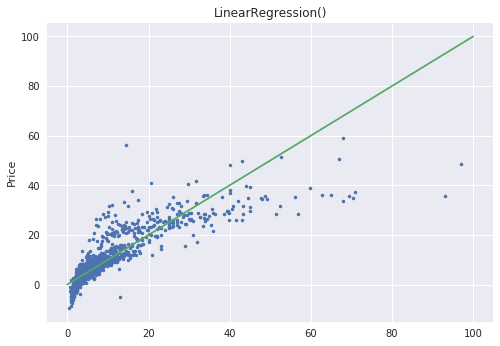

In [43]:
# 선형 회귀
regression(LinearRegression(), X_train, X_test, y_train, y_test, ylim=100, title = 'LinearRegression()', label = 'Price')

<Train Set>
R-square:	 0.7581510813384114
MSE:	 30.623339500679723

<Model Coefficient>
[[ 3.53169926e+00  2.06274025e-01 -8.15279176e-02 -4.16692101e-01
   4.91400193e+00 -4.11097267e-01 -6.38911957e-02  4.41255147e-02
  -4.59017329e-29  8.11416662e-02 -2.61459566e-01  8.47664240e-02
   2.32849397e+00  2.67441154e+00  2.88620110e-01  1.10719432e-01
  -5.50269992e-02  7.95133402e-02 -4.09469624e-02  1.09460889e-01
   4.36817952e-01 -1.17540942e-01  1.72196656e+00  2.21599205e-01
   1.07863448e+00  2.31785696e+00 -5.48872208e-01  8.00107340e-01
   2.89694687e+00  1.03202312e+00 -6.40434376e-02 -4.79880040e-02
   1.51650921e+00  2.33831796e-02  3.42175296e-03 -4.39295806e-29
  -1.26734803e-01 -4.31479701e-02 -4.41411762e-02  3.99507118e-01]]
[9.52773497]

<Test Set>
R-square:	 0.7249483420998659


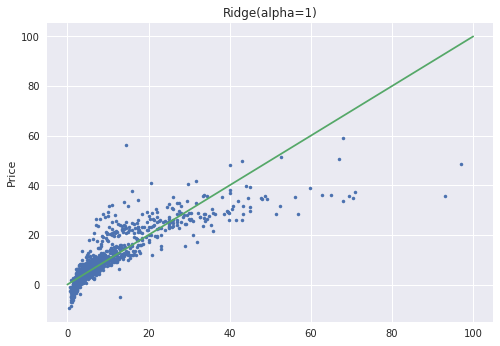

In [44]:
alpha = 1# alpha: 정규화의 정도를 결정해주는 하이퍼파라미터 (클수록 더 정규화)
regression(Ridge(alpha=alpha), X_train, X_test, y_train, y_test, ylim=100, title = 'Ridge(alpha={0})'.format(alpha), label = 'Price')

<Train Set>
R-square:	 0.757330507197604
MSE:	 30.727242055375793

<Model Coefficient>
[ 3.44338957e+00  1.52082059e-01 -3.06676594e-02 -2.60715285e-01
  4.91646007e+00 -3.65270304e-01 -2.37192979e-02  0.00000000e+00
 -0.00000000e+00  4.04171839e-02 -3.46403302e-01  3.80000989e-02
  2.21150117e+00  2.54158043e+00  2.44521176e-01  8.82383740e-04
 -2.73928785e-02  1.12476832e-02 -7.70952616e-03  0.00000000e+00
  2.46641750e-01 -7.88306493e-02  1.64870632e+00  1.57432411e-01
  1.03578653e+00  2.24326934e+00 -5.54099816e-01  5.70402715e-01
  2.77628732e+00  9.50708058e-01 -2.68668392e-02 -4.30379167e-02
  1.44788243e+00 -0.00000000e+00 -1.01238014e-02 -0.00000000e+00
 -1.44719909e-01 -6.69044454e-02 -7.13997550e-02  3.31425348e-01]
[9.52650509]

<Test Set>
R-square:	 0.7251029559325177


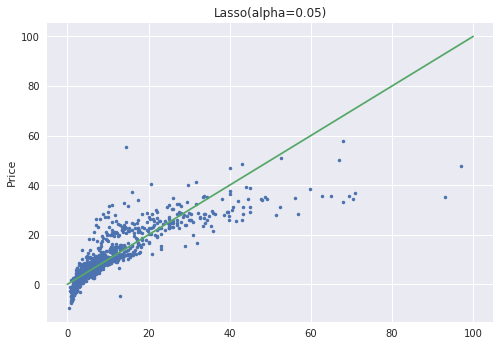

In [45]:
alpha = 0.05# alpha: 정규화의 정도를 결정해주는 하이퍼파라미터 (클수록 더 정규화)
regression(Lasso(alpha=alpha), X_train, X_test, y_train, y_test, ylim=100, title ='Lasso(alpha={})'.format(alpha), label ='Price')

### 2) Regression with Log Price

In [67]:
# train test split 
X_train, X_test, y_train, y_test = train_test_split(X2, y_, test_size=0.2, random_state=0)

<Train Set>
R-square:	 0.9049350493159805
MSE:	 0.07314598606013174

<Model Coefficient>
[ 4.38541525e-01 -3.51884591e-03 -2.43419174e-02 -8.48542708e-02
  3.11064187e-01  5.52395460e-03 -5.77356722e-05  1.20415081e-01
  1.31180561e-17 -1.36783836e-03 -7.64335639e-02 -1.25399696e-03
  1.32679979e-01  1.53344602e-01  1.05828517e-02 -5.46715833e-02
 -2.56090463e-02 -2.36567828e-02 -1.34010913e-03 -3.75110488e-02
 -1.72334884e-02 -1.08566970e-02  6.67225815e-02  1.35621774e-02
  1.73401073e-02  8.40587681e-02 -5.80898505e-02 -2.13954247e-02
  1.51857263e-01  7.21754290e-02  3.63081181e-03 -1.95472312e-02
  4.20060415e-02 -1.77479334e-02  4.20672139e-03  2.75211266e-18
 -9.67855295e-02  3.30561659e-03 -2.27200497e-02  3.01667811e-02]
1.8262154360201786

<Test Set>
R-square:	 0.8991445392769961


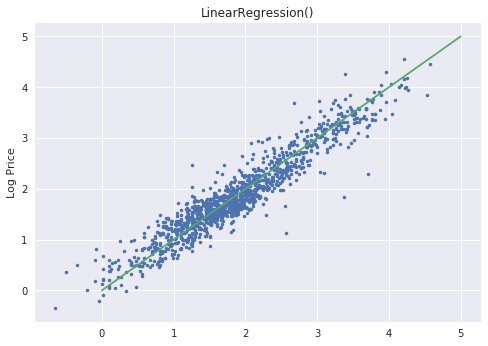

In [47]:
# 선형 회귀
regression(LinearRegression(), X_train, X_test, y_train, y_test, ylim=5, title = 'LinearRegression()', label = 'Log Price')

<Train Set>
R-square:	 0.9049350490231933
MSE:	 0.07314598628541152

<Model Coefficient>
[ 4.38528795e-01 -3.51967090e-03 -2.43454538e-02 -8.48529629e-02
  3.11051652e-01  5.52610004e-03 -5.73948912e-05  1.20417997e-01
  3.77369180e-30 -1.36822351e-03 -7.64441018e-02 -1.25438300e-03
  1.32674942e-01  1.53339076e-01  1.05832547e-02 -5.46727174e-02
 -2.56087239e-02 -2.36573255e-02 -1.34001365e-03 -3.75117835e-02
 -1.72371139e-02 -1.08559980e-02  6.67211423e-02  1.35627661e-02
  1.73407078e-02  8.40564379e-02 -5.80884069e-02 -2.14008050e-02
  1.51852468e-01  7.21730741e-02  3.63094241e-03 -1.95480995e-02
  4.20060479e-02 -1.77488003e-02  4.20415034e-03  4.14347035e-30
 -9.67852483e-02  3.30608102e-03 -2.27216170e-02  3.01653648e-02]
1.8262152582693771

<Test Set>
R-square:	 0.8991447883439687


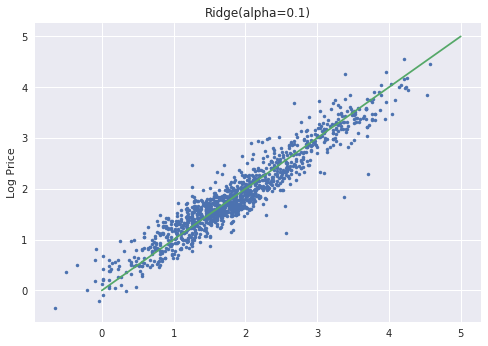

In [48]:
# alpha: 정규화의 정도를 결정해주는 하이퍼파라미터 (클수록 더 정규화)
alpha = 0.1
regression(Ridge(alpha=alpha), X_train, X_test, y_train, y_test, ylim=5, title = 'Ridge(alpha={})'.format(alpha), label = 'Log Price')

<Train Set>
R-square:	 0.904918950136608
MSE:	 0.07315837327899095

<Model Coefficient>
[ 0.43810351 -0.00314597 -0.02395617 -0.08385864  0.31422669  0.00389121
 -0.          0.11956703  0.         -0.00093874 -0.07755569 -0.00081529
  0.13204762  0.1523918   0.00987751 -0.053508   -0.02482355 -0.02289245
 -0.00081264 -0.03626623 -0.01527273 -0.01043054  0.06597355  0.01313785
  0.01663263  0.08350609 -0.05635449 -0.0190714   0.15102939  0.07158325
  0.00320855 -0.01860458  0.04101664 -0.01659169  0.00388208  0.
 -0.09549855  0.00361633 -0.02139704  0.02967109]
1.8261917618635983

<Test Set>
R-square:	 0.8991204991413229


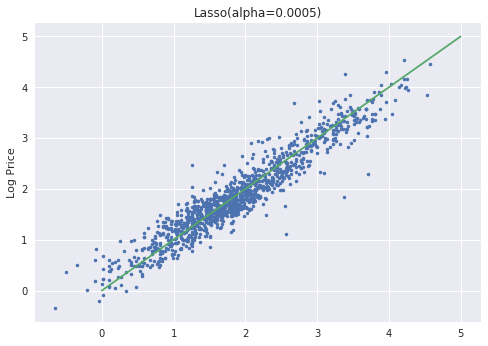

In [49]:
# alpha: 정규화의 정도를 결정해주는 하이퍼파라미터 (클수록 더 정규화)
alpha = 0.0005
regression(Lasso(alpha=alpha), X_train, X_test, y_train, y_test, ylim=5, label = 'Log Price', title = 'Lasso(alpha={})'.format(alpha))

target 변수가 price인 경우와 log price인 경우에 대해 하이퍼파라미터들을 조정하면서 다양한 regression을 시도하였다.

그 결과, Log Price를 사용하는 편이 설명력이 높아지는 것을 확인할 수 있었다.

## statsmodel OLS 

In [34]:
import statsmodels.api as sm

In [35]:
y = np.array(y).reshape(-1,1)

In [36]:
model = sm.OLS(y, X2)
result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.438
Model:                            OLS   Adj. R-squared (uncentered):              0.435
Method:                 Least Squares   F-statistic:                              116.6
Date:                Thu, 28 Jan 2021   Prob (F-statistic):                        0.00
Time:                        01:51:26   Log-Likelihood:                         -22968.
No. Observations:                6019   AIC:                                  4.602e+04
Df Residuals:                    5979   BIC:                                  4.628e+04
Df Model:                          40                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [63]:
# p-value 값이 큰 변수부터 하나씩 제거하기
X3 = X2.drop(['Company_Renault', 'Company_Skoda', 'Company_Toyota', 'Company_Force', 'Fuel_Type_CNG', 'Company_Mitsubishi', 'Company_Volkswagen', 'Company_Mini', 'Owner_Type', 'Company_Chevrolet', 'Company_Fiat', 'Company_Smart', 'Company_Ford', 'Company_Datsun'], axis = 'columns')
model = sm.OLS(y, X3)
result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.433
Model:                            OLS   Adj. R-squared (uncentered):              0.430
Method:                 Least Squares   F-statistic:                              176.0
Date:                Thu, 28 Jan 2021   Prob (F-statistic):                        0.00
Time:                        02:04:22   Log-Likelihood:                         -22996.
No. Observations:                6019   AIC:                                  4.604e+04
Df Residuals:                    5993   BIC:                                  4.622e+04
Df Model:                          26                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

p-value가 높은 순으로 하나씩 column을 지워보았지만 큰 변화는 없었다. 즉, OLS model은 본 데이터에는 적합하지 않은 모델이라 생각한다.

## 회귀분석 가정 검토 

설명력이 높았던 log price에 대한 linear regression 모델의 가정을 검토해보았다.

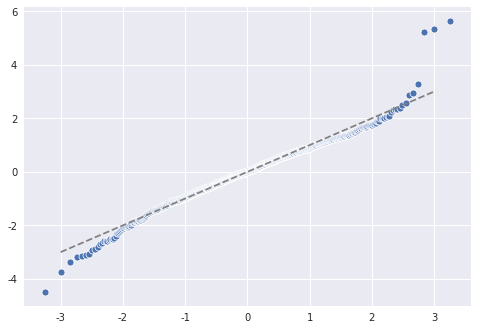

In [69]:
import scipy.stats

# 모델을 통해 얻은 예측값 
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

# 잔차 = 실제값 - 예측값 
residual = y_test - pred

sr = scipy.stats.zscore(residual)
(x, y), _ = scipy.stats.probplot(sr)

# 잔차의 정규성 
sns.scatterplot(x, y)
plt.plot([-3, 3], [-3, 3], '--', color='grey')
plt.show()

잔차가 직선과 거의 유사한 모양을 띄는 것을 보아 정규성을 만족하고 있음을 알 수 있다.

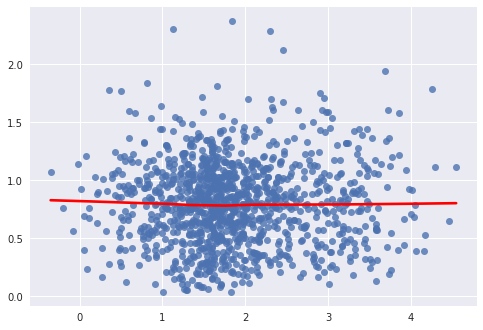

In [70]:
# 잔차의 등분산성 
sns.regplot(pred, np.sqrt(np.abs(sr)), lowess=True, line_kws={'color': 'red'})
plt.show()

잔차가 등분산성을 거의 만족함을 확인할 수 있다.

정리하자면, X값들을 normalize하고 log price를 target으로 Linear Regression을 실행했을 때, R-square이 가장 높게 나왔다. 또한, 잔차를 검토한 결과 정규성과 등분산성을 만족함을 알 수 있었다.